* 計算時間
    - 全体の実行時間
        - k=1,2,3,...,50それぞれの実行時間(ログを残しておけば1回で計測可能)
* 求めたシードに対する影響数
    - 各シード(2個ずつで計25回)に対して、10000回のシュミレーション

* データ
    - 各データに関して行う

* どのノードを通ったのか?
    - 通っていないまたは、通ることが少ないノードを特定すれば面白いかも

In [1]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
import pandas as pd
from InfMaxProblem import Monte_Carlo as mc
import collections

%matplotlib inline

# データの読み込み

In [63]:
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data.csv")
network.head()

,# FromNodeId,ToNodeId,WC
0,0,4,0.111111
1,0,5,0.090909
2,0,7,0.333333
3,0,8,0.250000
4,0,9,0.333333


In [64]:
# numpy型に変換
network_np = network.values

In [65]:
# 空の有向グラフを作成
G = nx.DiGraph()

In [66]:
# 重み付きの枝を加える
G.add_weighted_edges_from(network_np)

In [127]:
def experiment_IC(G, seed, T=100):
    V_reach = {i:0 for i in G.nodes()}
    V_pass = {i:0 for i in G.nodes()}
    inf_sum = 0
    inf_size = []
    for i in range(T):
        simulation = mc.IC_simulation(G, seed)
        simulation_cnt = collections.Counter(simulation.values())
        # 到達頂点
        V_reach_update = {key:V_reach[key]+1 for key in simulation}
        V_reach.update(V_reach_update)
        
        # 通過頂点
        V_pass_update = {key:V_pass[key]+value for key, value in simulation_cnt.items()}
        V_pass.update(V_pass_update)
        
        # 影響数
        inf_sum += len(simulation)
        inf_size.append(inf_sum / (i+1))
    return V_reach, V_pass, inf_size

In [128]:
V_reach, V_pass, inf_size = experiment_IC(G, [3,0])

In [129]:
V_reach

{0.0: 100,
 4.0: 30,
 5.0: 36,
 7.0: 70,
 8.0: 44,
 9.0: 45,
 10.0: 30,
 11.0: 32,
 12.0: 26,
 13.0: 100,
 14.0: 41,
 15.0: 55,
 16.0: 37,
 17.0: 59,
 18.0: 43,
 19.0: 41,
 20.0: 40,
 21.0: 25,
 22.0: 40,
 23.0: 100,
 24.0: 33,
 25.0: 19,
 26.0: 26,
 27.0: 24,
 28.0: 29,
 29.0: 35,
 1.0: 32,
 2.0: 25,
 6.0: 21,
 3.0: 100}

In [130]:
pd.DataFrame.from_dict(V_reach, orient='index', columns=["reach_size"]).sort_values("reach_size", ascending=False)

,reach_size
0.0,100
13.0,100
23.0,100
3.0,100
7.0,70
17.0,59
15.0,55
9.0,45
8.0,44
18.0,43


In [131]:
pd.DataFrame.from_dict(V_pass, orient='index', columns=["pass_times"]).sort_values("pass_times", ascending=False)

,pass_times
0.0,738
3.0,138
11.0,40
27.0,39
26.0,37
23.0,36
1.0,34
12.0,32
25.0,31
10.0,29


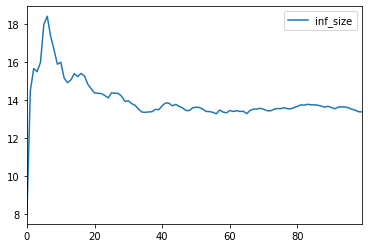

In [132]:
pd.DataFrame(inf_size, columns=["inf_size"]).plot()

In [ ]:
# いろいろなアルゴリズムが存在している
# https://github.com/nd7141/influence-maximization/tree/master/IC

In [1]:
# IMMの実装
# https://github.com/snowgy/Influence_Maximization

In [ ]:
# シンプルなシュミレーションとCELFの実装
# https://github.com/ethen8181/machine-learning/blob/master/networkx/max_influence/max_influence.ipynb